# Euler's integration

We are going to look at how Euler's integration performs at reproducing a radioactive decay.

The equation for radioactive decay is 
\begin{equation}
\frac{\mathrm{d} N}{\mathrm{d} t} = -\frac{N}{\tau} \equiv f(N,t),
\end{equation}

Its exact solution is
\begin{equation}
N(t) = N_0 e^{-t/\tau}.
\end{equation}

This small exercise aims at implementing an Euler integration scheme for this simple case.
This is given by
\begin{equation}
x(t+\Delta t) \approx x(t) + \Delta t \frac{\mathrm{d} x}{\mathrm{d} t} = x(t) + \Delta t f(x(t), t)
\end{equation}





In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us define the function of the exact solution (which we know !)

x0 is the initial number of nuclei, tau the mid lifetime

In [2]:
# Exact solution of the Nuclear decay equation
def radioactive_decay(x0, t, tau):
    return x0*np.exp(-t/tau)

Let us now define the derivative function dx/dt = f(x,t) = -x/tau:

In [3]:
# Derivative of the number of Nuclei (dx/dt)
def dx_dt(x, tau):
    return -x/tau

Now let us define an evolver function, which will perform the Euler integration. We want to keep in memory the solution x(t) and the time t to later plot the result and compare it to the exact solution

In [4]:
def evolve_Euler(x0, tau, dt, N_steps):
    xe = np.zeros((N_steps + 1))
    te = np.zeros((N_steps + 1))
    # Define initial conditions!
    xe[0], te[0] = x0, 0

    print("now is time to work")
    for i in range(N_steps):
        # Write down here the Euler integration scheme
        xe[i+1] = xe[i] + dt*dx_dt(xe[i], tau)
        te[i+1] = te[i] + dt
    return te, xe

Now let's define the initial condition x0, and the mid lifetime tau, the time step dt and the number of integration steps. 
And compute both an array with the exact solution and an array with the integration result

In [5]:
Time_max = 10

# Initial conditions for the integration
x0, tau, dt = 1000, 1, 0.8
N_steps = int(Time_max/float(dt))

# Computation of the exact solution
exact_solution = np.zeros(Time_max*10)
time = np.arange(Time_max*10)/10.
for i in np.arange(len(exact_solution)):
    exact_solution[i] = radioactive_decay(x0, time[i], tau)
    
# Computation of the Euler's integration
te, xe = evolve_Euler(x0, tau, dt, N_steps)


now is time to work


Now let's plot both the exact solution and the integration result

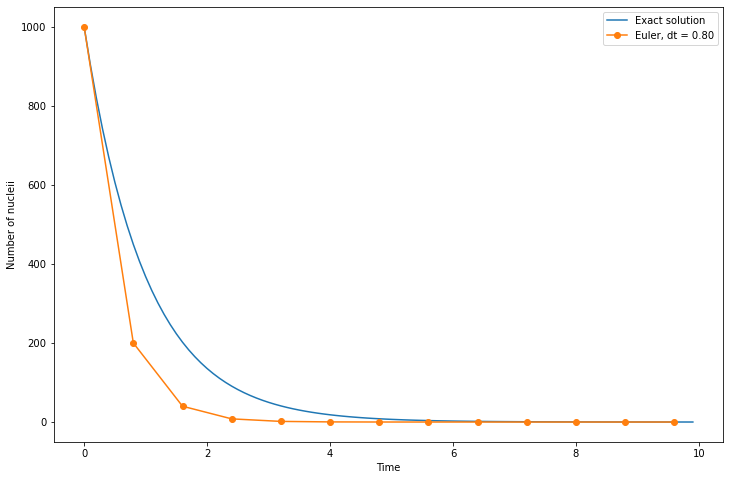

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(time, exact_solution, '-', label="Exact solution")
ax.plot(te, xe, '-o', label="Euler, dt = %.2f" %dt)

ax.set_ylabel("Number of nucleii")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

This is not too good...

What happens with we decrease the timestep?

now is time to work, choose your time step and continue
now is time to work


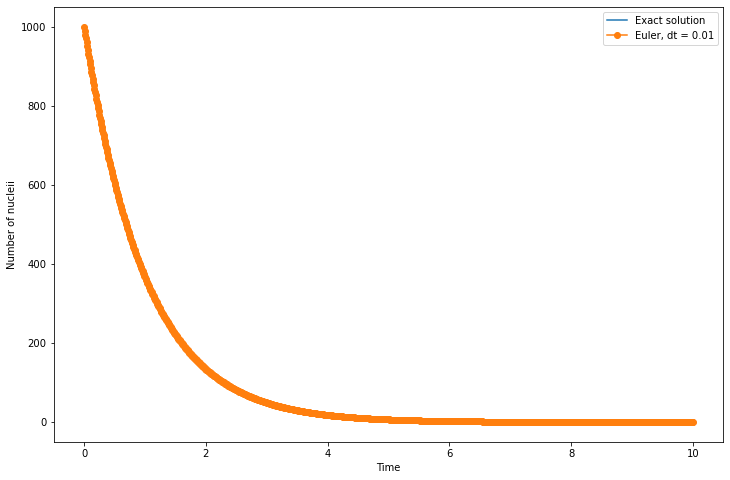

In [7]:
print("now is time to work, choose your time step and continue")
dt = 0.01

N_steps = int(Time_max/float(dt))
# Computation of the Euler's integration
te, xe = evolve_Euler(x0, tau, dt, N_steps)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(time, exact_solution, '-', label="Exact solution")
ax.plot(te, xe, '-o', label="Euler, dt = %.2f" %dt)

ax.set_ylabel("Number of nucleii")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

That's better, let us increase even more

now is time to work, choose another smaller time step and continue
now is time to work


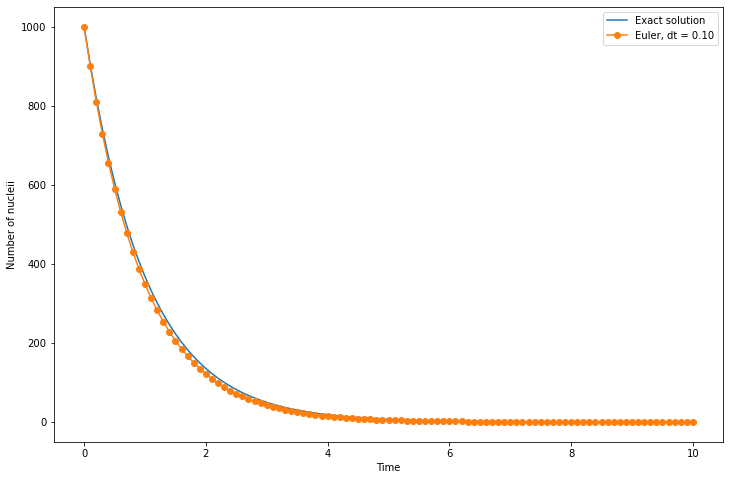

In [8]:
print("now is time to work, choose another smaller time step and continue")
dt = 0.1

N_steps = int(Time_max/float(dt))
# Computation of the Euler's integration
te, xe = evolve_Euler(x0, tau, dt, N_steps)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(time, exact_solution, '-', label="Exact solution")
ax.plot(te, xe, '-o', label="Euler, dt = %.2f" %dt)

ax.set_ylabel("Number of nucleii")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

## Error estimation



It is interesting to try to quantify the performance of an integrator. 
This is done by calculating an error: back to the blackboard!

Let us calculate and plot the error.

In [ ]:
dt = [0.8, 0.5, 0.1, 0.01]

N_steps = [int(Time_max/float(x)) for x in dt]
print(N_steps)

# Computation of the Euler's integration for the different dt

te_err = []
xe_err = []
for i in np.arange(len(dt)):
    tmp = evolve_Euler(x0, tau, dt[i], N_steps[i])
    te_err.append(tmp[0])
    xe_err.append(tmp[1])

# Computation of the error for the different dt by taking the exact solution minus Euler's integration.
# Call it error_Euler, it should have a dimension len(dt) x N_steps

print("now is time to work, compute the error for every dt!")
error_Euler = #
 
# Plot

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for i in np.arange(len(dt)):
    ax.plot(te_err[i], error_Euler[i], '-', label="dt = %.2f" %dt[i])

ax.set_ylabel("Error")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Heun's integration

We are going to look at how Heun's integration performs at reproducing a radioactive decay.

Heun's integration is given by
\begin{equation}
x(t+\Delta t) \approx x(t) + \frac{1}{2} \Delta t \left(f(x(t)) + f(x(t+\Delta t)) \right),
\end{equation}
where for the $x(t+\Delta t)$ on the left term is evaluated using a simple Euler step.


In [ ]:
def evolve_Heun(x0, tau, dt, N_steps):
    xh = np.zeros((N_steps + 1))
    th = np.zeros((N_steps + 1))
    # Define initial conditions!
    xh[0], th[0] = x0, 0

    print("now is time to work")

    for i in range(N_steps):
        # Write down here the Heun integration scheme
        # ...
    return th, xh

Let's see how this perform, and let's compare with the Euler method

In [ ]:
dt = 0.8
N_steps = int(Time_max/float(dt))
# Computation of the Euler's integration
te, xe = evolve_Euler(x0, tau, dt, N_steps)
# Computation of the Heun's integration
th, xh = evolve_Heun(x0, tau, dt, N_steps)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(time, exact_solution, '-', label="Exact solution")
ax.plot(te, xe, '-o', label="Euler, dt = %.2f" %dt)
ax.plot(th, xh, '-o', label="Heun, dt = %.2f" %dt)

ax.set_ylabel("Number of nucleii")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

It looks like it's performing better than Euler's scheme!
Let's decrease the time step.

In [ ]:
print("now is time to work: choose your time step and continue")
dt = 0.0

N_steps = int(Time_max/float(dt))
# Computation of the Euler's integration
te, xe = evolve_Euler(x0, tau, dt, N_steps)
# Computation of the Heun's integration
th, xh = evolve_Heun(x0, tau, dt, N_steps)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(time, exact_solution, '-', label="Exact solution")
ax.plot(te, xe, '-o', label="Euler, dt = %.2f" %dt)
ax.plot(th, xh, '-o', label="Heun, dt = %.2f" %dt)

ax.set_ylabel("Number of nucleii")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

## Error estimation

Let's compare the errors for the two schemes

In [ ]:
dt = [0.8, 0.5, 0.1, 0.01]

N_steps = [int(Time_max/float(x)) for x in dt]
print(N_steps)

# Computation of the Heun's integration for the different dt (Euler was done previously)

th_err = []
xh_err = []
for i in np.arange(len(dt)):
    tmp = evolve_Heun(x0, tau, dt[i], N_steps[i])
    th_err.append(tmp[0])
    xh_err.append(tmp[1])

# Computation of the error for the different dt by taking the exact solution minus Heun's integration solution: 
# Call it error_Heun and it should have dimensions of len(dt) x N_steps

print("now is time to work, you can copy paste and update what you did for Euler")
error_Heun = #

# Plot

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for i in np.arange(len(dt)):
    line, = ax.plot(te_err[i], error_Euler[i], '-', label="Euler, dt = %.2f" %dt[i])
    ax.plot(th_err[i], error_Heun[i], '--', c=line.get_color(), label="Heun, dt = %.2f" %dt[i])

ax.set_ylabel("Error")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

# Runge-Kutta of order 2 and 4

The equations governing the integration of Runge-Kutta of order 2 are

\begin{equation}
\begin{split}
k_1 & = h f(x_n, t_n) \\
k_2 & = h f\left(x_n + \frac{1}{2} k_1, t_n + \frac{1}{2}h\right) \\
x_{n+1} & = x_n + k_2 + \mathcal{O}(h^3)
\end{split}
\end{equation}

The equations governing the integration of Runge-Kutta of order 4 are

\begin{equation}
\begin{split}
k_1 & = h f(x_n, t_n) \\
k_2 & = h f\left(x_n + \frac{1}{2} k_1, t_n + \frac{1}{2}h\right) \\
k_3 & = h f\left(x_n + \frac{1}{2} k_2,  t_n + \frac{1}{2}h\right)  \\
k_4 & = h f\left(x_n + k_3, t_n + h\right)\\
x_{n+1} & = x_n + \frac{1}{6}k_1 + \frac{1}{3}k_2 + \frac{1}{3}k_3+ \frac{1}{6}k_4 + \mathcal{O}(h^5)
\end{split}
\end{equation}

Let us see how this performs compared each other and then to Euler and Heun.

In [ ]:
# Integrator Runge Kutta of order 2

def evolve_RK2(x0, tau, dt, N_steps):
    xh = np.zeros((N_steps + 1))
    th = np.zeros((N_steps + 1))
    # Define initial conditions!
    xh[0], th[0] = x0, 0
    print("now is time to work")

    for i in range(N_steps):
        # Write down here the RK2 integration scheme
        
        k1 = # write here
        k2 = # write here
        xh[i+1] = # write here
        th[i+1] = th[i] + dt
    return th, xh

In [ ]:
# Integrator Runge Kutta of order 4

def evolve_RK4(x0, tau, dt, N_steps):
    xh = np.zeros((N_steps + 1))
    th = np.zeros((N_steps + 1))
    # Define initial conditions!
    xh[0], th[0] = x0, 0
    print("now is time to work")

    for i in range(N_steps):
        # Write down here the RK4 integration scheme
        
        k1 = # write here
        k2 = # write here
        k3 = # write here
        k4 = # write here
        xh[i+1] = # write here
        th[i+1] = th[i] + dt
    return th, xh

First let us compare the two Runge-Kutta with each other

In [ ]:
dt = 0.8
N_steps = int(Time_max/float(dt))
# Computation of the RK2 integration
tRK2, xRK2 = evolve_RK2(x0, tau, dt, N_steps)
# Computation of the RK4 integration
tRK4, xRK4 = evolve_RK4(x0, tau, dt, N_steps)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(time, exact_solution, '-', label="Exact solution")
ax.plot(tRK2, xRK2, '-o', label="RK2, dt = %.2f" %dt)
ax.plot(tRK4, xRK4, '-o', label="RK4, dt = %.2f" %dt)

ax.set_ylabel("Number of nucleii")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

## Error estimation

Let us compute the corresponding errors

In [ ]:
dt = [0.8, 0.4, 0.2, 0.1]

N_steps = [int(Time_max/float(x)) for x in dt]
print(N_steps)

# Computation of the Heun's integration for the different dt (Euler was done previously)

tRK2_err = []
xRK2_err = []
tRK4_err = []
xRK4_err = []
for i in np.arange(len(dt)):
    tmp = evolve_RK2(x0, tau, dt[i], N_steps[i])
    tRK2_err.append(tmp[0])
    xRK2_err.append(tmp[1])
    tmp = evolve_RK4(x0, tau, dt[i], N_steps[i])
    tRK4_err.append(tmp[0])
    xRK4_err.append(tmp[1])

# Computation of the error for the different dt by taking the exact solution minus RK's integration

error_RK2 = []
error_RK4 = []
for i in np.arange(len(dt)):
    error_tmp1 = np.zeros(N_steps[i]+1)
    error_tmp2 = np.zeros(N_steps[i]+1)
    for j in np.arange(N_steps[i]+1):
        error_tmp1[j] = radioactive_decay(x0, tRK2_err[i][j], tau) - xRK2_err[i][j]
        error_tmp2[j] = radioactive_decay(x0, tRK4_err[i][j], tau) - xRK4_err[i][j]
    error_RK2.append(error_tmp1)
    error_RK4.append(error_tmp2)
  
# Plot

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for i in np.arange(len(dt)):
    line, = ax.plot(tRK2_err[i], np.abs(error_RK2[i]), '-', label="RK2, dt = %.2f" %dt[i])
    ax.plot(tRK4_err[i], np.abs(error_RK4[i]), '--', c=line.get_color(), label="RK4, dt = %.2f" %dt[i])

ax.set_ylabel("Error")
ax.set_xlabel("Time")
ax.set_yscale('log')
ax.legend(loc=0, prop={'size':10})

The RK4 with a time step of 0.8 performs better than a RK2 with a time step of 0.2, so it is about 4 times more accurate.

Now let us compare the 4 methods:

In [ ]:
dt = 0.8
N_steps = int(Time_max/float(dt))
# Computation of the Euler's integration
te, xe = evolve_Euler(x0, tau, dt, N_steps)
# Computation of the Heun's integration
th, xh = evolve_Heun(x0, tau, dt, N_steps)
# Computation of the RK2 integration
tRK2, xRK2 = evolve_RK2(x0, tau, dt, N_steps)
# Computation of the RK4 integration
tRK4, xRK4 = evolve_RK4(x0, tau, dt, N_steps)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(time, exact_solution, '-', label="Exact solution")
ax.plot(te, xe, '-o', label="Euler, dt = %.2f" %dt)
ax.plot(th, xh, '-o', label="Heun, dt = %.2f" %dt)
ax.plot(tRK2, xRK2, '-o', label="RK2, dt = %.2f" %dt)
ax.plot(tRK4, xRK4, '-o', label="RK4, dt = %.2f" %dt)

ax.set_ylabel("Number of nucleii")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})